In [6]:
import numpy as np
import matplotlib.pyplot as plt 

sizes = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
prices = np.array([245, 315, 279, 308, 199, 219, 405, 324, 319, 255])


# normalizes 

sizes_mean = np.mean(sizes)
sizes_std = np.std(sizes)
norm_sizes = (sizes - sizes_mean) / sizes_std

prices_mean = np.mean(prices)
prices_std = np.std(prices)
norm_prices = (prices - prices_mean) / prices_std

# y = x0*w0 + x1*w1 

In [9]:
X = np.vstack([np.ones(norm_sizes.shape[0]), norm_sizes]).T
y = norm_prices

# 1. Linear Regression with OLS (Normal equation) 

In [27]:
w_ols = np.linalg.inv(X.T@X)@X.T@y

In [28]:
w_ols

array([-2.18189785e-16,  7.58717142e-01])

In [29]:
y_pred_ols = X@w_ols

In [30]:
y_pred_ols

array([-0.6028833 , -0.22010025, -0.02870873,  0.30622644, -1.17705788,
       -0.31579602,  1.21533619,  1.40672771, -0.55503542, -0.02870873])

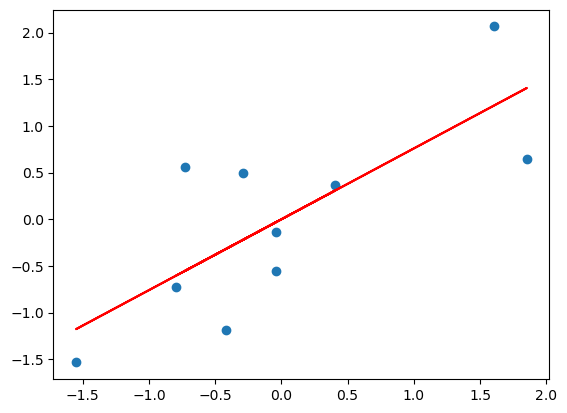

In [31]:
plt.scatter(norm_sizes, norm_prices)
plt.plot(norm_sizes, y_pred_ols, label="normal equation", color='red')

In [19]:
# denormalization
y_pred_denorm = y_pred * prices_std + prices_mean
y_pred_denorm

array([252.29231626, 274.20195673, 285.15677696, 304.32771238,
       219.42785555, 268.72454661, 356.3631085 , 367.31792873,
       255.03102132, 285.15677696])

# Gradient Descent Method 

array([-0.73028727,  0.49268184, -0.1362737 ,  0.37038493, -1.53395269,
       -1.18453294,  2.0650707 ,  0.64992073,  0.56256579, -0.5555774 ])

In [35]:
learning_rate = 0.01
epochs = 100 

def gradient_fn(w, X, y):
    m = len(y)
    cost = X.T @ (X @ w - y ) * 1/m
    return cost 

w = np.zeros(X.shape[1]) # [0, 0]

for epoch in range(epochs):
    w = w - learning_rate * gradient_fn(w, X, y)
    
    if epoch % 100 == 0:
        print(f"Iterations: {epoch}\n Error: {(X@w - y)**2}")

    
    

Iterations: 0
 Error: [0.52455028 0.24490903 0.01849236 0.13492594 2.31703837 1.39564684
 4.2144696  0.40430961 0.32275595 0.30834733]


In [36]:
w

array([-1.37001521e-16,  4.81002130e-01])

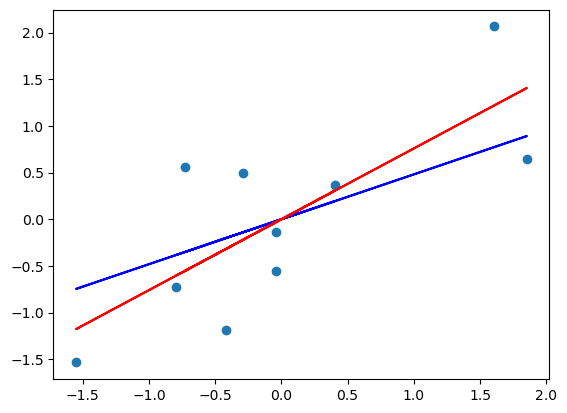

In [37]:
y_pred = X @ w
plt.scatter(norm_sizes, norm_prices)
plt.plot(norm_sizes, y_pred, label="gradiet descent method", color="blue")
plt.plot(norm_sizes, y_pred_ols, label="normal equation method", color="red")

